In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import mean_squared_error, mean_absolute_error
# from firstTest import Net


ModuleNotFoundError: No module named 'firstTest'

In [2]:
# load the model
# model = Net()
# model.load_state_dict(torch.load('model.pth'))
# model.eval()

In [3]:
# data preparation
data = pd.read_csv('param_mod.csv')

X =data.iloc[:, 0:2].values
Y = data.iloc[:, 2].values
print(X.shape, Y.shape)
sc = StandardScaler()
X = sc.fit_transform(X)
sc_Y = StandardScaler()
Y = Y.reshape(-1, 1)
Y = sc_Y.fit_transform(Y)


# split the data into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=42)
# print the shape of the data
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

# convert the data into PyTorch tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
Y_train = torch.FloatTensor(Y_train)
Y_test = torch.FloatTensor(Y_test)
print(X_train.shape, Y_train.shape)

# create a DataLoader
train_data = TensorDataset(X_train, Y_train)
train_loader = DataLoader(dataset=train_data, batch_size=128, shuffle=True)







(10201, 2) (10201,)
(6120, 2) (6120, 1) (4081, 2) (4081, 1)
torch.Size([6120, 2]) torch.Size([6120, 1])


In [4]:
# get the 1st row of the tarin_X
print(X_train[0])
print(Y_train[0])

tensor([-1.2348,  0.8918])
tensor([-1.1381])


In [5]:
model = Net()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [6]:
import numpy as np
num_epochs = 2000
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * data.size(0)
    train_loss = train_loss / len(train_loader.dataset)
    train_losses.append(train_loss)

    model.eval()
    test_loss = 0.0
    predictions = []
    targets = []
    
    with torch.no_grad():
        for i in range(len(X_test)):
            data, target = X_test[i].unsqueeze(0), Y_test[i].unsqueeze(0)
            output = model(data)
            test_loss += criterion(output, target).item() * data.size(0)
            predictions.append(output.item())
            targets.append(target.item())
    
    test_loss = test_loss / len(X_test)
    test_losses.append(test_loss)
    
    # 反标准化预测结果和目标值
    predictions = sc_Y.inverse_transform(np.array(predictions).reshape(-1, 1))
    targets = sc_Y.inverse_transform(np.array(targets).reshape(-1, 1))
    
    # 计算回归评估指标
    mse = mean_squared_error(targets, predictions)
    mae = mean_absolute_error(targets, predictions)
    
    print(f'Epoch: {epoch}, Training Loss: {train_loss}, Testing Loss: {test_loss}, MSE: {mse}, MAE: {mae}')

Epoch: 0, Training Loss: 0.6299513461543065, Testing Loss: 0.5432209508765395, MSE: 1.0675966242183727e-07, MAE: 0.0002848502209429335
Epoch: 1, Training Loss: 0.5560342495737512, Testing Loss: 0.5291490619705039, MSE: 1.0399410265850177e-07, MAE: 0.00028107677494486593
Epoch: 2, Training Loss: 0.5322846188264735, Testing Loss: 0.5157796721822197, MSE: 1.0136660541082625e-07, MAE: 0.0002761312315260951
Epoch: 3, Training Loss: 0.5174359236667359, Testing Loss: 0.5038753320801647, MSE: 9.902703581409535e-08, MAE: 0.0002740284131916361
Epoch: 4, Training Loss: 0.5038412346559412, Testing Loss: 0.4959033626075729, MSE: 9.746029781107953e-08, MAE: 0.0002699226736310771
Epoch: 5, Training Loss: 0.48829532740942017, Testing Loss: 0.4814887633682605, MSE: 9.462738469964664e-08, MAE: 0.00026605461209767403
Epoch: 6, Training Loss: 0.48281825850991644, Testing Loss: 0.46952542507638434, MSE: 9.227621992488275e-08, MAE: 0.0002623737663110218
Epoch: 7, Training Loss: 0.46682696061975815, Testing 

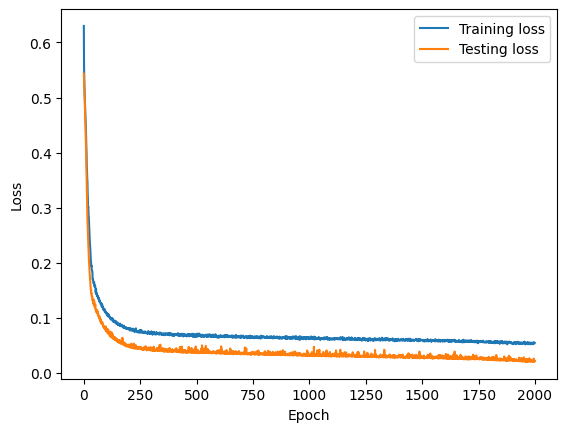

In [7]:
# draw the loss curve
import matplotlib.pyplot as plt
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Testing loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

(4081, 1)


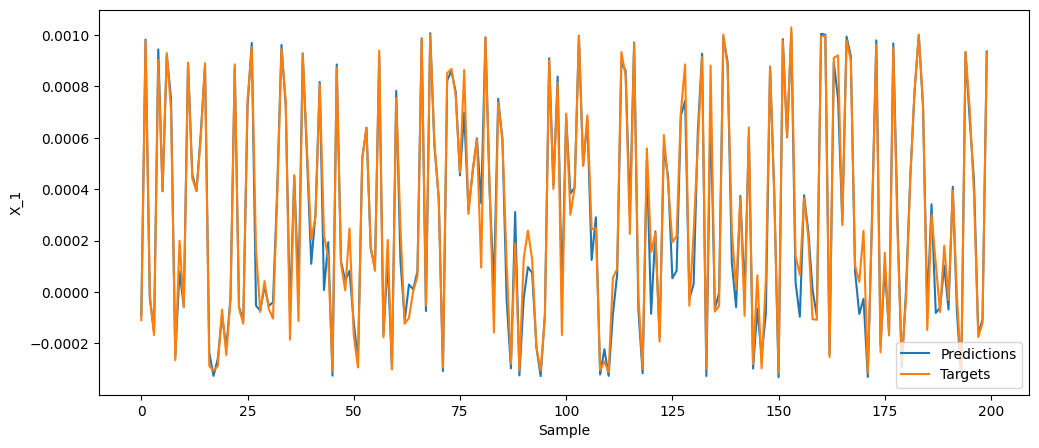

In [12]:
# plot the predictions vs the targets use 100 samples
plt.figure(figsize=(12, 5))
plt.plot(predictions[:200], label='Predictions')
print(predictions.shape)
plt.plot(targets[:200], label='Targets')
plt.ylabel('X_1')
plt.xlabel('Sample')
plt.legend()
plt.show()




In [13]:
# save the model
torch.save(model.state_dict(), 'model.pth')
